# Computer Vision

## Lab 6

### Imports

In [89]:
# IO
from glob import glob

# Computation
import cv2
import numpy as np
from skimage import color, img_as_float32
from natsort import natsorted

# Plotting
import matplotlib.pyplot as plt

### Load images

In [12]:
path_pairs = list(zip(
    natsorted(glob('../assets/images-1024x768/*.png')),
    natsorted(glob('../assets/masks-1024x768/*.png')),
))

images = np.array([img_as_float32(cv2.cvtColor(cv2.imread(i_path), cv2.COLOR_BGR2RGB)) for i_path, _ in path_pairs])
masks = np.array([img_as_float32(cv2.cvtColor(cv2.imread(m_path), cv2.COLOR_BGR2RGB)) for _, m_path in path_pairs])

### 1. Find Contours

#### 1.1. get_puzzle_contour

In [95]:
def get_puzzle_contour(mask):
    contours, _ = cv2.findContours(mask, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    max_contour = []
    max_contour_area = 0
    
    for contour in contours:
        area = cv2.contourArea(contour)
        
        is_closed = area > cv2.arcLength(contour, closed=True)
        has_max_area = area > max_contour_area
        
        if is_closed and has_max_area:
            max_contour = contour.reshape(-1, contour.shape[-1])
            max_contour_area = area
            
    return max_contour

### 1.2. get_clockwise_contour

In [94]:
def get_clockwise_contour(contour):
    if (cv2.contourArea(contour, oriented=True) < 0):
        return np.flip(contour, axis=0)
    return contour

#### 1.3 Function explanations

*cv2.findContours* : Explanation

*cv2.contourArea with oriented=True* : Explanation

#### 1.4 Plotting contours

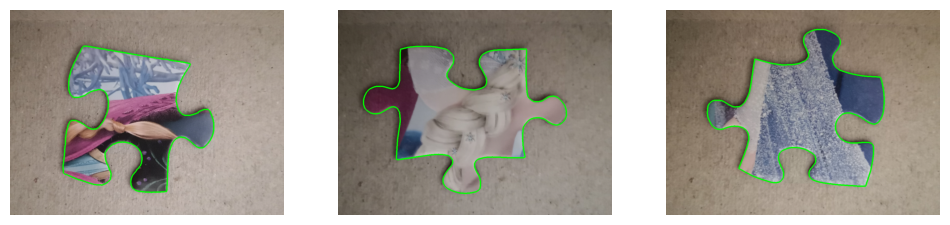

In [111]:
num_sample = 3
indices = np.random.randint(0, len(masks), num_sample)

def mask_to_bin(mask):
    mask_gray = color.rgb2gray(mask)
    _, mask_bin = cv2.threshold(mask_gray, 0.5, 1, cv2.THRESH_BINARY)
    return np.array(mask_bin * 255, dtype=np.uint8)


fig = plt.figure(figsize=(num_sample*4, 4))

for i, idx in enumerate(indices):
    mask = mask_to_bin(masks[idx])
    image = images[idx]
    
    contour = get_puzzle_contour(mask)
    contour = get_clockwise_contour(contour)
    contour_image = cv2.drawContours(image, [contour.reshape(-1, 1, 2)], 0, (0,1,0), 3)
    
    fig.add_subplot(1, num_sample, i+1)
    plt.imshow(contour_image)
    plt.axis('off')